### Cleaning up Data

In [3]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

%matplotlib inline
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 10]})

In [4]:
# Loading dataset into DataFrame
nba_data_df = pd.read_csv('Seasons_Stats.csv')

In [5]:
# Declare desired columns
columns = ['Year', 'Player', 'Pos', 'G', 'MP', 'USG%', 'WS', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', "PTS"]

In [6]:
# Assign desired columns to DataFrame
nba_data_df = nba_data_df[columns]

In [7]:
# Drop all rows that contain NaN values
nba_data_df = nba_data_df.dropna()

In [8]:
# Filter DataFrame to players from the 2014-2017 season, who played at least 50 games and 1000 minnutes
nba_data_df = nba_data_df.loc[(nba_data_df.G >= 50) & (nba_data_df.MP >= 1000) & (nba_data_df.Year >=2014)]

In [9]:
# Display cleaned DataFrame
nba_data_df

,Year,Player,Pos,G,MP,USG%,WS,FG%,3P%,FT%,TRB,AST,STL,BLK,PTS
22260,2014.00000,Arron Afflalo,SG,73.00000,2552.00000,23.30000,5.30000,0.45900,0.42700,0.81500,262.00000,248.00000,35.00000,3.00000,1330.00000
22263,2014.00000,LaMarcus Aldridge,PF,69.00000,2498.00000,29.80000,7.50000,0.45800,0.20000,0.82200,765.00000,178.00000,63.00000,68.00000,1603.00000
22264,2014.00000,Lavoy Allen,PF,65.00000,1072.00000,14.60000,1.50000,0.44700,0.15400,0.66000,311.00000,71.00000,24.00000,33.00000,303.00000
22267,2014.00000,Ray Allen,SG,73.00000,1936.00000,16.80000,4.10000,0.44200,0.37500,0.90500,205.00000,143.00000,54.00000,8.00000,701.00000
22268,2014.00000,Tony Allen,SG,55.00000,1278.00000,20.10000,2.70000,0.49400,0.23400,0.62800,208.00000,94.00000,90.00000,19.00000,495.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24668,2017.00000,Lou Williams,SG,58.00000,1403.00000,30.60000,4.90000,0.44400,0.38500,0.88400,132.00000,183.00000,65.00000,10.00000,1078.00000
24670,2017.00000,Marvin Williams,PF,76.00000,2295.00000,16.30000,5.00000,0.42200,0.35000,0.87300,498.00000,106.00000,58.00000,53.00000,849.00000
24684,2017.00000,Nick Young,SG,60.00000,1556.00000,19.50000,3.20000,0.43000,0.40400,0.85600,137.00000,58.00000,37.00000,14.00000,791.00000
24685,2017.00000,Thaddeus Young,PF,74.00000,2237.00000,16.50000,4.60000,0.52700,0.38100,0.52300,449.00000,122.00000,114.00000,30.00000,814.00000


**DataFrame Column Labels**
```
Year: Year of Season
Player: Player Name
Pos:  Position
G:  Games Played
MP:  Minutes Played
USG%:  Player Usage Percentage
WS:  Win Shares
FG%:  Field Goal Percentage
3P%:  3-Point Shooting Percentage
FT%:  Free-Throw Shooting Percentage
TRB:  Total Rebounds
AST:  Total Assists
STL:  Total Steals
BLK:  Total Blocks
PTS:  Total Points Scored
```

### Data Exploration

In [10]:
def corrbubble(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_value = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 1000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.8, cmap="bwr",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 20 + 5
    ax.annotate(corr_value, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size);

In [11]:
def scatter_corr(df):
    sns.set(style='white', font_scale=1.2);
    g = sns.PairGrid(df, aspect=1.4, diag_sharey=False);
    g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'red'});
    g.map_diag(sns.distplot, kde_kws={'color': 'darkblue'});
    g.map_upper(corrbubble);

In [12]:
# Display key stats for DataFrame
nba_data_df.describe()

,Year,G,MP,USG%,WS,FG%,3P%,FT%,TRB,AST,STL,BLK,PTS
count,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000,1045.00000
mean,2015.54833,71.55502,1887.85837,19.81301,4.13751,0.45171,0.31023,0.76280,325.39330,182.83923,61.39234,34.71675,827.05550
std,1.12393,8.63334,520.84122,5.07761,2.95235,0.05391,0.12132,0.09252,183.33276,141.23454,30.62987,33.68760,408.15082
min,2014.00000,50.00000,1000.00000,8.10000,-2.10000,0.30500,0.00000,0.35500,47.00000,19.00000,8.00000,0.00000,159.00000
25%,2015.00000,66.00000,1432.00000,16.20000,2.10000,0.41700,0.29300,0.71500,195.00000,83.00000,39.00000,13.00000,516.00000
50%,2016.00000,74.00000,1865.00000,19.30000,3.60000,0.44300,0.34400,0.77900,280.00000,139.00000,55.00000,23.00000,758.00000
75%,2017.00000,79.00000,2300.00000,23.10000,5.40000,0.47700,0.37500,0.82900,403.00000,233.00000,77.00000,43.00000,1043.00000
max,2017.00000,83.00000,3125.00000,41.70000,19.20000,0.71400,1.00000,0.94000,1226.00000,906.00000,191.00000,219.00000,2593.00000


In [13]:
# Display DataFrame's dtypes and non-null counts
nba_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 22260 to 24686
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    1045 non-null   float64
 1   Player  1045 non-null   object 
 2   Pos     1045 non-null   object 
 3   G       1045 non-null   float64
 4   MP      1045 non-null   float64
 5   USG%    1045 non-null   float64
 6   WS      1045 non-null   float64
 7   FG%     1045 non-null   float64
 8   3P%     1045 non-null   float64
 9   FT%     1045 non-null   float64
 10  TRB     1045 non-null   float64
 11  AST     1045 non-null   float64
 12  STL     1045 non-null   float64
 13  BLK     1045 non-null   float64
 14  PTS     1045 non-null   float64
dtypes: float64(13), object(2)
memory usage: 130.6+ KB


C:\Users\Mike\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


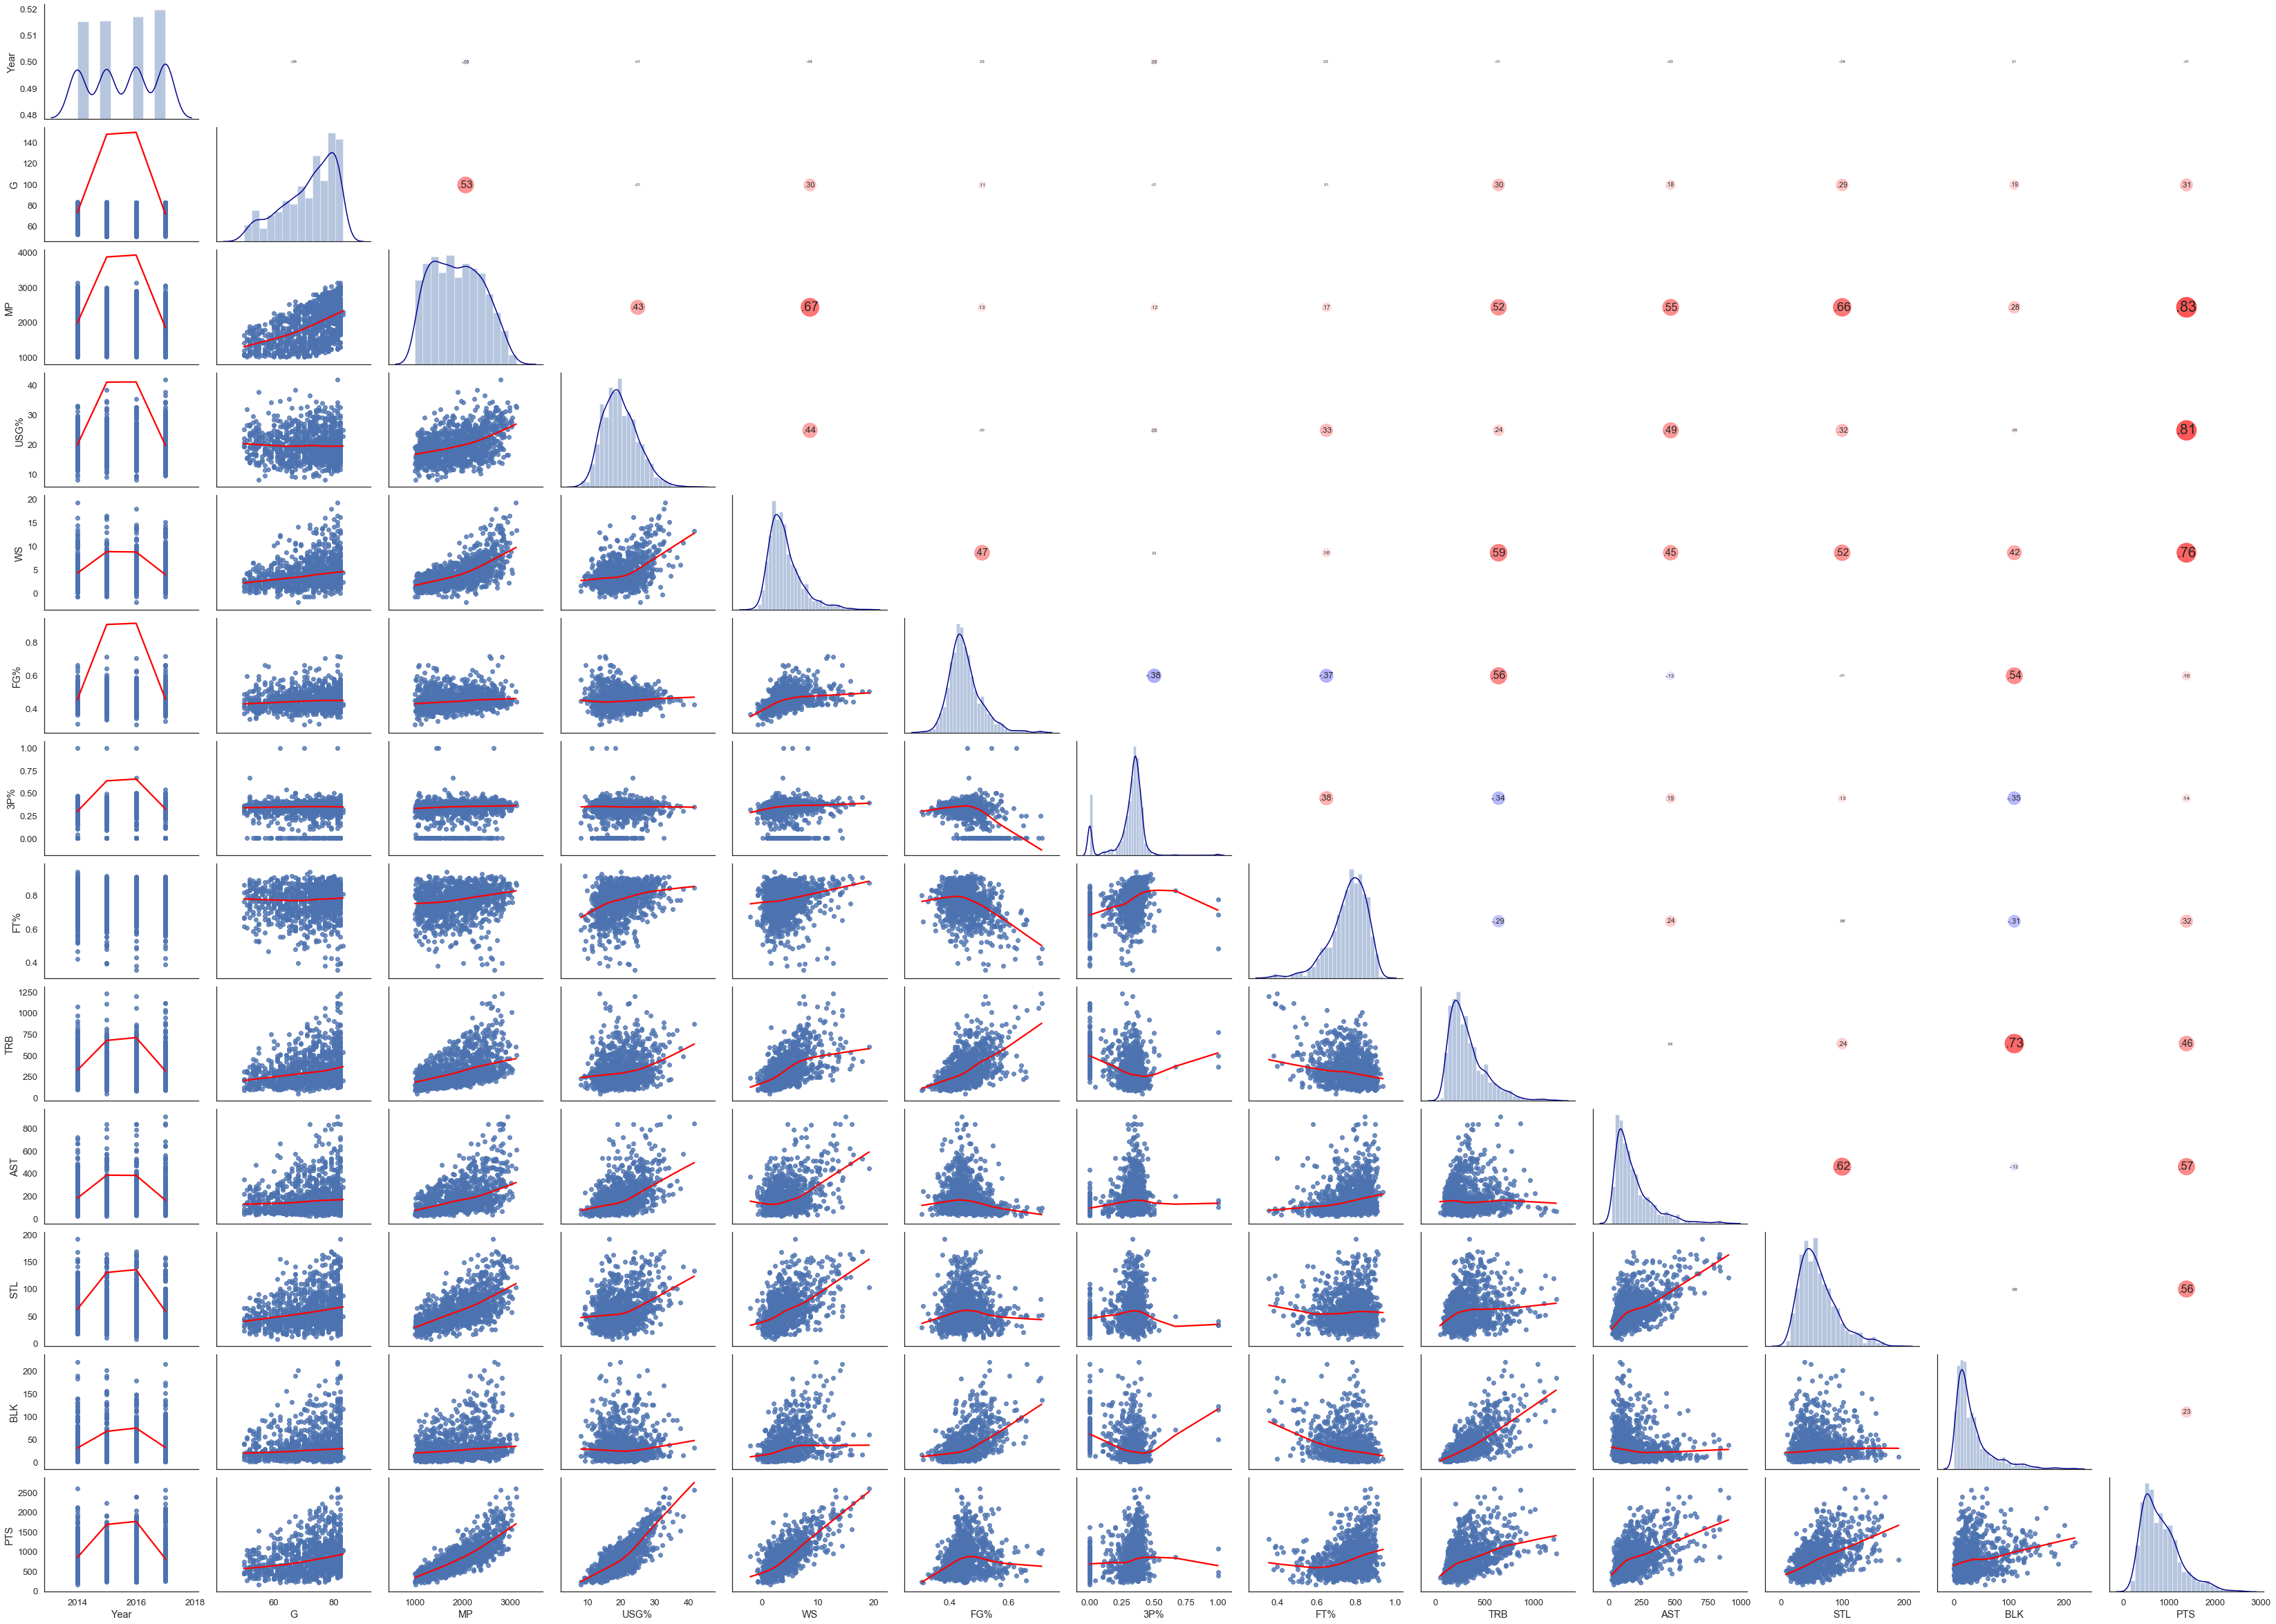

In [14]:
# Display bubble scatter plot matrix
scatter_corr(nba_data_df)

In [17]:
X = sm.add_constant(X)
lr_model = sm.OLS(y, X).fit()

# Display summary stats for DataFrame
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WS   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     524.1
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:15:32   Log-Likelihood:                -1629.1
No. Observations:                1045   AIC:                             3282.
Df Residuals:                    1033   BIC:                             3342.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7906      0.911     -1.966      0.050      -3.578      -0.003
G             -0.0076      0.005     -1.461      0.144      -0.018       0.003
MP            -0.0037      0.000    -17.164      0.000      -0.004      -0.003
USG%          -0.4356      0.020    -22.088      0.000      -0.474      -0.397
FG%           12.2903      0.953     12.890      0.000      10.419      14.161
3P%            0.9025      0.357      2.525      0.012       0.201       1.604
FT%            5.3330      0.506     10.547      0.000       4.341       6.325
TRB            0.0046      0.000     12.539      0.000       0.004       0.005
AST            0.0053      0.000     13.962      0.000       0.005       0.006
STL            0.0142      0.002      8.125      0.000       0.011       0.018
BLK            0.0071      0.002      4.362      0.000       0.004       0.010
PTS            0.0105      0.000     26.586      0.000       0.010       0.011
==============================================================================
Omnibus:                       19.394   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.821
Skew:                          -0.213   Prob(JB):                     2.47e-06
Kurtosis:                       3.642   Cond. No.                     7.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Start Linear Regression

In [16]:
# Declare X response variables
X = nba_data_df[['G', 'MP', 'USG%', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]

# Declare y predictor variable
y = nba_data_df['WS']

In [18]:
# Display size of X and y
X.shape, y.shape

((1045, 12), (1045,))

#### Split Dataset to Train and Test Datasets

In [19]:
# Import train_test_split package
from sklearn.model_selection import train_test_split

In [20]:
# Split dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Learning and Fitting a Regression Model

In [21]:
# Import linear model package
from sklearn import linear_model

# Create LinearRegression constructor
linreg = linear_model.LinearRegression()

In [22]:
# Fit the model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Making Predictions

In [23]:
# Make predictions
ws_y_pred = linreg.predict(X_test)

#### Compute Regression Metrics

In [24]:
# Import metrics package
from sklearn import metrics

In [25]:
# Display the regression metrics R2, MSE, and RMSE
print('R2:', metrics.r2_score(y_test, ws_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, ws_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ws_y_pred)))

R2: 0.8100596009341392
MSE: 1.3242724917364823
RMSE: 1.1507703905369144


### Feature Selection

#### Scale the Data

In [26]:
# Import MinMaxScaler package
from sklearn.preprocessing import MinMaxScaler

# Scale X_train
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)

# Display scaled X_train shape
scaled_X_train.shape

(731, 12)

#### Fit RFE Model

In [27]:
# Import RFE package
from sklearn.feature_selection import RFE

In [28]:
# Construct RFE model
rfe = RFE(linreg, n_features_to_select=7)

In [29]:
# Fit RFE model
rfe.fit(scaled_X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=7, step=1, verbose=0)

#### rfe.ranking_ and rfe.support_

In [30]:
# Display features ranked
sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

[(1, 'AST'),
 (1, 'FG%'),
 (1, 'FT%'),
 (1, 'MP'),
 (1, 'PTS'),
 (1, 'TRB'),
 (1, 'USG%'),
 (2, 'STL'),
 (3, 'BLK'),
 (4, '3P%'),
 (5, 'G'),
 (6, 'const')]

In [31]:
# Assign feature ranking to new test and train variables
X_test_rfe = X_test[X_test.columns[rfe.support_]]
X_train_rfe = X_train[X_train.columns[rfe.support_]]

#### Re-evalutaion of the model with the subset of features

In [32]:
# Fit new RFE dataset
linreg.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Make predictions
ws_y_pred_rfe = linreg.predict(X_test_rfe)

In [34]:
# Optimized model results
print('R2: ', metrics.r2_score(y_test, ws_y_pred_rfe))
print('MSE', metrics.mean_squared_error(y_test, ws_y_pred_rfe))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, ws_y_pred_rfe)))

R2:  0.7951249900374637
MSE 1.42839723024668
RMSE 1.1951557347252617


### Feature Importance

In [35]:
# Import RandomForestRegressor package
from sklearn.ensemble import RandomForestRegressor

# Create RanddomForestRegressor constructor
rf = RandomForestRegressor()

In [36]:
# Fit model
rf.fit(scaled_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
# Create variables for features, importance, and indices
features = X_train.columns
importance = rf.feature_importances_
indices = np.argsort(importance)

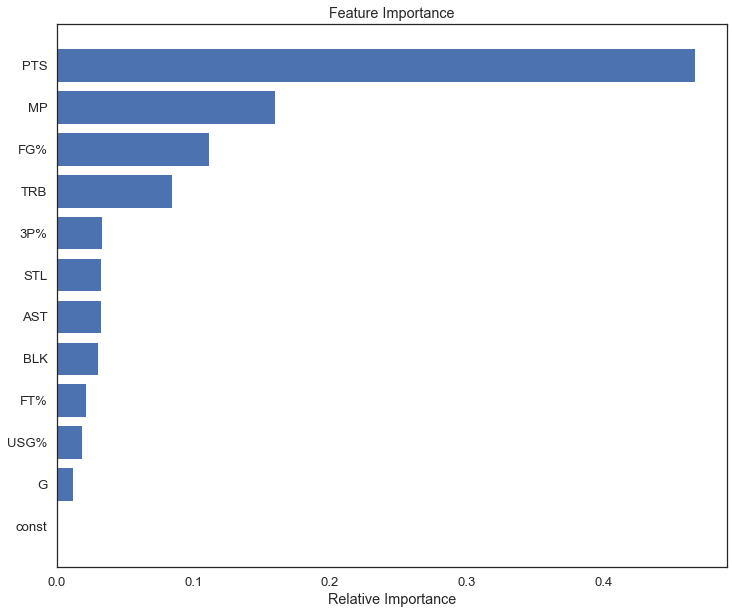

In [38]:
# Plot feature importance bar graph
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), features[indices]);
plt.xlabel('Relative Importance')
plt.title('Feature Importance');

### Residual and Q-Q Plots

In [39]:
# Calculate residual
resd = y_test - ws_y_pred

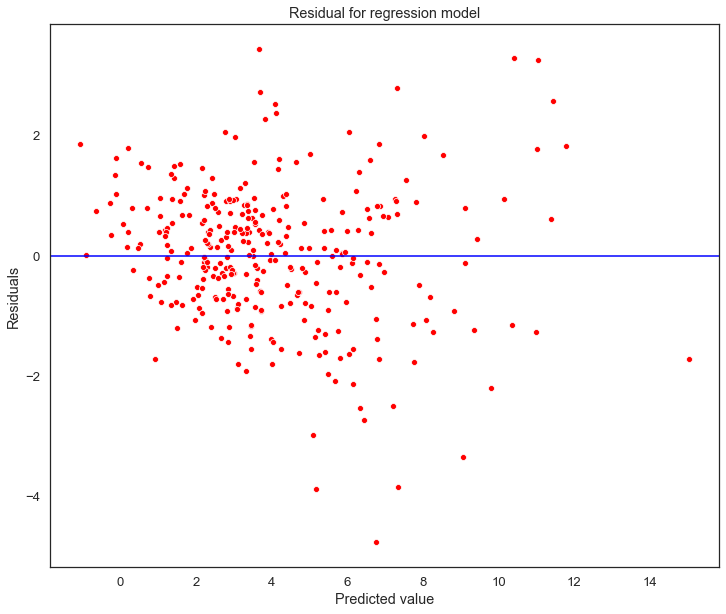

In [40]:
# Create residual plot
sns.scatterplot(ws_y_pred, resd, color='red')

# Add horizontal line on x-axis
plt.axhline(y=0, color='blue')

# Add title and labels
plt.title('Residual for regression model')
plt.xlabel('Predicted value')
plt.ylabel('Residuals');

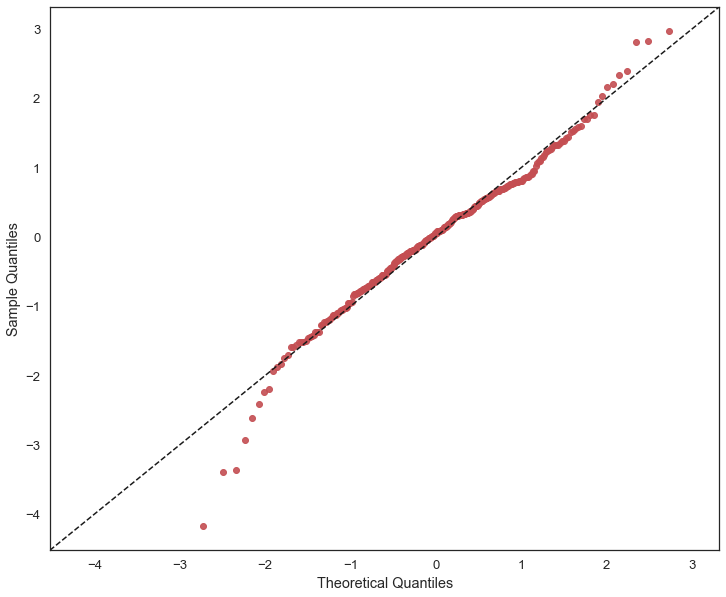

In [41]:
# Create Q-Q Plot
pp = sm.ProbPlot((resd), fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='r', markeredgecolor='r', alpha=0.9)
sm.qqline(qq.axes[0], line='45', fmt='k--')

plt.show()

### Win Share Prediction Results

In [43]:
# Create DataFrame containing actual and predicted win shares
ws_df = pd.DataFrame( {'Actual_WS':y_test.values, 'Predicted_WS': ws_y_pred_rfe})

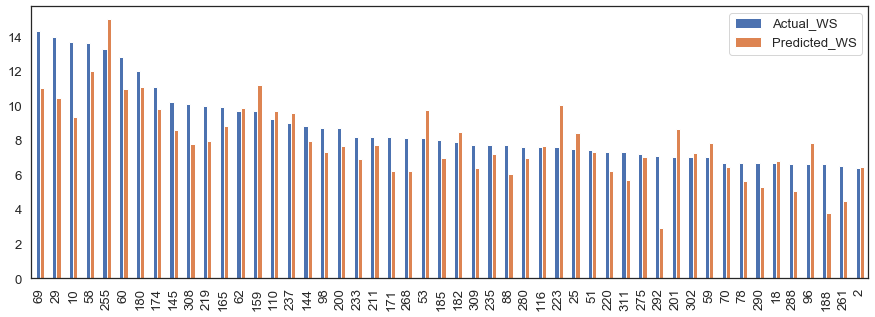

In [49]:
# Plot top 50 observations with the highest actual win shares
ws_df.sort_values('Actual_WS', ascending=False).head(50).plot(kind = 'bar', figsize=(15,5))